In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

# numpy package
import numpy as np
import math

# keras modules
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten

# for plotting
%matplotlib inline
import matplotlib.pyplot as plt

# load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()



Using TensorFlow backend.


(100, 32, 32, 3)
airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck


C:\Users\Ellysah\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:50: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations


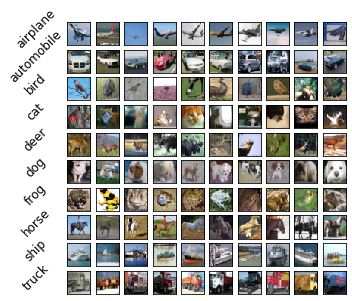

In [2]:
%matplotlib inline
batch_size = 32
num_classes = 10
epochs = 20
row_names = ['{}'.format(row) for row in ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']]

class_id = 0
class_count = 0
images = None
for i in range(100):
    while True:
        index = np.random.randint(0, x_train.shape[0], size=1)
        image = x_train[index]
        if y_train[index] == class_id:
            break

    if images is None:
        images = image
    else:
        images = np.concatenate([images, image], axis=0)
    class_count += 1
    if class_count == 10:
        class_id += 1
        class_count = 0
      
print(images.shape)
plt.figure(figsize=(5, 5))
num_images = images.shape[0]
image_size = images.shape[1]
rows = int(math.sqrt(num_images))
row_names = ['{}'.format(row) for row in ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']]
index = 0
for i in range(num_images):
    ax = plt.subplot(rows, rows, i + 1)
    image = images[i, :, :, :]
    image = np.reshape(image, [image_size, image_size, 3])
    plt.imshow(image)
    # plt.axis('off')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(False)
    ax.xaxis.set_ticks_position('none') 
    ax.yaxis.set_ticks_position('none') 
    if (i % rows) == 0:
        ax.set_ylabel(row_names[index], rotation=45, size='large')
        ax.yaxis.labelpad = 20
        print(row_names[index])
        index += 1

plt.tight_layout()
plt.savefig("cifar10-samples.png")
plt.show();
#plt.close('all')


In [3]:
#pre-processing
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  /= 255
x_test /= 255

In [11]:
hidden_units = 1024
dropout = 0.1
input_size = x_train.shape[1:]
# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
#layer1
model.add(Flatten(input_shape = input_size))
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(dropout))
#layer2
model.add(Dense(512))
model.add(Activation('sigmoid'))
model.add(Dropout(dropout))
#layer3
model.add(Dense(512))
model.add(Activation('sigmoid'))
model.add(Dropout(dropout))
#output
model.add(Dense(num_classes))
# this is the output for one-hot vector
model.add(Activation('softmax'))
model.summary()
# plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
activation_13 (Activation)   (None, 1024)              0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 512)               524800    
_________________________________________________________________
activation_14 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
__________

In [14]:
# loss function for one-hot vector
# use of sgd optimizer with default lr=0.01
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# train the network
epochs = 20
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)


Epoch 1/20
50000/50000 [==============================] - 250s 5ms/step - loss: 1.3795 - acc: 0.5023
Epoch 2/20
50000/50000 [==============================] - 250s 5ms/step - loss: 1.3584 - acc: 0.5105
Epoch 3/20
50000/50000 [==============================] - 250s 5ms/step - loss: 1.3400 - acc: 0.5177
Epoch 4/20
50000/50000 [==============================] - 249s 5ms/step - loss: 1.3204 - acc: 0.5242
Epoch 5/20
50000/50000 [==============================] - 249s 5ms/step - loss: 1.3039 - acc: 0.5319
Epoch 6/20
50000/50000 [==============================] - 249s 5ms/step - loss: 1.2896 - acc: 0.5375
Epoch 7/20
50000/50000 [==============================] - 249s 5ms/step - loss: 1.2752 - acc: 0.5420
Epoch 8/20
50000/50000 [==============================] - 248s 5ms/step - loss: 1.2636 - acc: 0.5455
Epoch 9/20
50000/50000 [==============================] - 249s 5ms/step - loss: 1.2457 - acc: 0.5543
Epoch 10/20
50000/50000 [==============================] - 250s 5ms/step - loss: 1.2347 - a

In [15]:
# validate the model on test dataset to determine generalization
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

10000/10000 [==============================] - 6s 564us/step

Test accuracy: 52.2%
